In [1]:
import numpy as np

data = {'x': [], 'y':[], 'class':[], 'color': []}


mean_std_dev = [([2,3], np.diag([0.8, 2.5])) ,
([5,6], np.diag([1.2, 1.9])),
([8,1], np.diag([0.9, 0.9])),
([15,4], np.diag([0.5, 2.0]))]
mean = [2, 3]
cov = np.diag([0.8, 2.5])
for i in range(0, 4):

    mean = mean_std_dev[i][0]
    cov = mean_std_dev[i][1]

    x, y = np.random.multivariate_normal(mean, cov, 100).T
    classe = []
    for c in range(0, len(x)):
        data['x'].append(x[c])
        data['y'].append(y[c])
        data['class'].append(f"class_{i}")
        if i == 0:
            data['color'].append((1.0, 0.0, 0.0))
        if i == 1:
            data['color'].append((1.0,0.0,1.0,))
        if i == 2:
            data['color'].append((1.0, 1.0, 0.0))
        if i == 3:
            data['color'].append((1.0, 0.5, 0.5))


In [2]:
import pandas as pd

df = pd.DataFrame(data)
df.head()

,x,y,class,color
0,3.012740,4.821031,class_0,"(1.0, 0.0, 0.0)"
1,1.815503,2.639913,class_0,"(1.0, 0.0, 0.0)"
2,2.613732,4.296166,class_0,"(1.0, 0.0, 0.0)"
3,2.598390,4.645221,class_0,"(1.0, 0.0, 0.0)"
4,3.388121,0.485954,class_0,"(1.0, 0.0, 0.0)"


c:\Users\eduse\anaconda3\conda\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='x', ylabel='y'>

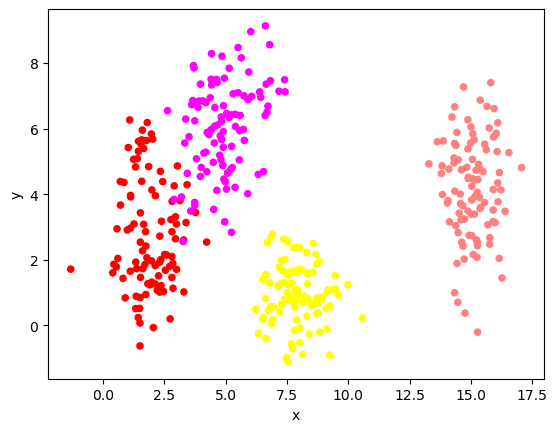

In [53]:
df.plot.scatter(x='x', y='y',c='color', colormap='viridis')

a.Percebe-se que as duas classes mais a direita estão bme disntintas. Enquanto, que as duas a mais esquerda, vermelho e roxo, apresentam um overlap entre elas.

b.Observando o plot precisa de duas linear boundays, para poder distinguir, uma vez que com uma apenas daria para separar entre duas metade  esquerdo e direito, wue teria duas classes cada.


## Exercicio 2

In [ ]:
import numpy as np
import pandas as pd

rng = np.random.default_rng(42)
data = {
    'x1': [], 'x2': [], 'x3': [], 'x4': [], 'x5': [],
    'class': [], 'color': []
}
params = [
    (
        np.array([0.0, 0.0, 0.0, 0.0, 0.0]),
        np.array([
            [1.0, 0.8, 0.1, 0.0, 0.0],
            [0.8, 1.0, 0.3, 0.0, 0.0],
            [0.1, 0.3, 1.0, 0.5, 0.0],
            [0.0, 0.0, 0.5, 1.0, 0.2],
            [0.0, 0.0, 0.0, 0.2, 1.0],
        ]),
        "class_A",
        (1.0, 0.0, 0.0), 
    ),
    (
        np.array([1.5, 1.5, 1.5, 1.5, 1.5]),
        np.array([
            [1.5, -0.7, 0.2, 0.0, 0.0],
            [-0.7, 1.5, 0.4, 0.0, 0.0],
            [0.2, 0.4, 1.5, 0.6, 0.0],
            [0.0, 0.0, 0.6, 1.5, 0.3],
            [0.0, 0.0, 0.0, 0.3, 1.5],
        ]),
        "class_B",
        (0.0, 0.0, 1.0), 
    ),
]

n_per_class = 500

for mean, cov, label, color in params:
    samples = rng.multivariate_normal(mean, cov, size=n_per_class)
    for s in samples:
        data['x1'].append(s[0])
        data['x2'].append(s[1])
        data['x3'].append(s[2])
        data['x4'].append(s[3])
        data['x5'].append(s[4])
        data['class'].append(label)
        data['color'].append(color)


df = pd.DataFrame(data)


         x1        x2        x3        x4        x5    class            color
0 -1.066846 -0.174621  0.135507  1.366949 -0.522722  class_A  (1.0, 0.0, 0.0)
1  0.969989  1.468796  0.436883  0.337675  0.319034  class_A  (1.0, 0.0, 0.0)
2 -0.066573 -0.791497 -1.356675 -0.434748 -0.586902  class_A  (1.0, 0.0, 0.0)
3  1.181304  0.864509 -0.473844  0.322390  0.648798  class_A  (1.0, 0.0, 0.0)
4 -0.430099  0.036130  0.982523  0.638111 -0.838178  class_A  (1.0, 0.0, 0.0)


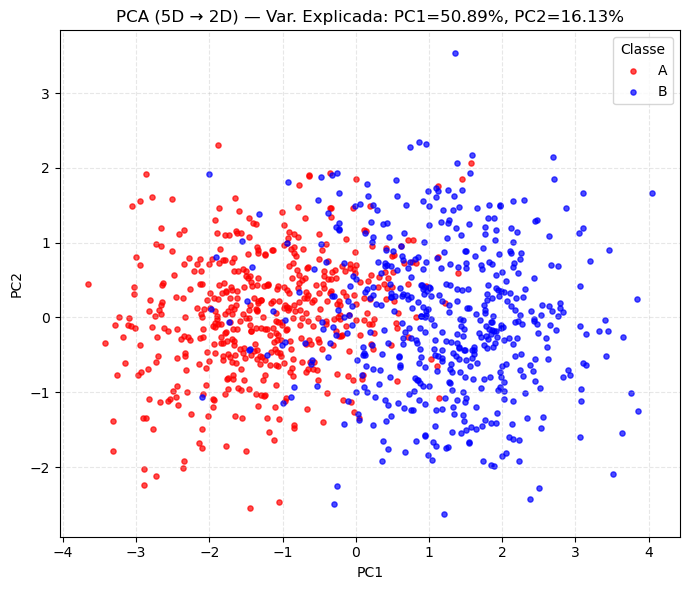

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df[['x1', 'x2', 'x3', 'x4', 'x5']].to_numpy()
y = df['class'].to_numpy()


X_std = StandardScaler().fit_transform(X)
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_std)


plot_df = pd.DataFrame({
    'PC1': X_2d[:, 0],
    'PC2': X_2d[:, 1],
    'class': y
})


class_to_color = {
    'class_A': (1.0, 0.0, 0.0),  
    'class_B': (0.0, 0.0, 1.0)   
}

plt.figure(figsize=(7, 6))
for label, color in class_to_color.items():
    subset = plot_df[plot_df['class'] == label]
    plt.scatter(
        subset['PC1'], subset['PC2'],
        s=14, alpha=0.7, label=label.replace('class_', '').upper(),
        c=[color]
    )


exp_var = pca.explained_variance_ratio_
plt.title(f"PCA (5D → 2D) — Var. Explicada: PC1={exp_var[0]:.2%}, PC2={exp_var[1]:.2%}")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Classe")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


## Exercicio 3

In [ ]:
CSV_PATH = "train.csv"  
df = pd.read_csv(CSV_PATH)
print("Carregado:", CSV_PATH, "shape:", df.shape)

    


num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df.select_dtypes(exclude=["int64", "float64"]).columns.tolist()
target = "Transported"
    
print("Features numéricas:", ", ".join(num_cols))
print("Features categóricas:", ", ".join(cat_cols))

    
    # 3. Valores faltantes
miss = df.isna().sum()
miss = miss[miss > 0].sort_values(ascending=False)
if len(miss) > 0:
    print("Colunas com faltantes:")
    print(miss.to_string())




Carregado: train.csv shape: (8693, 14)
Features numéricas: Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
Features categóricas: PassengerId, HomePlanet, CryoSleep, Cabin, Destination, VIP, Name, Transported
Colunas com faltantes:
CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name', 'Transported']
Transported
CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
dtype: int64


Carregado: train.csv shape: (8693, 14)

Faltantes por coluna:
CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
Features finais: (8693, 16)


C:\Users\eduse\AppData\Local\Temp\ipykernel_17124\366270068.py:43: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[c] = df[c].fillna(fill).map({True: 1, False: 0}).astype(int)
C:\Users\eduse\AppData\Local\Temp\ipykernel_17124\366270068.py:43: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[c] = df[c].fillna(fill).map({True: 1, False: 0}).astype(int)


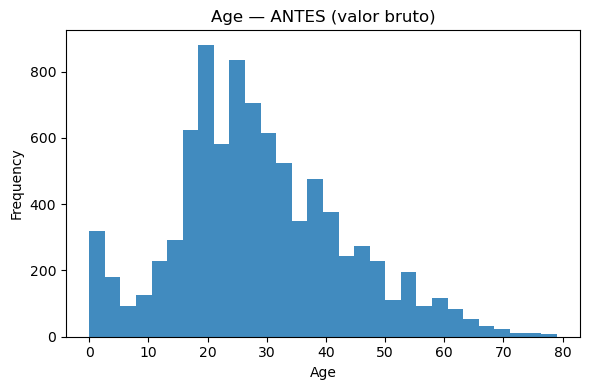

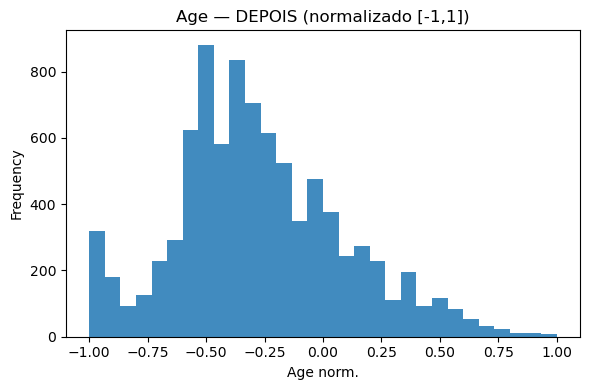

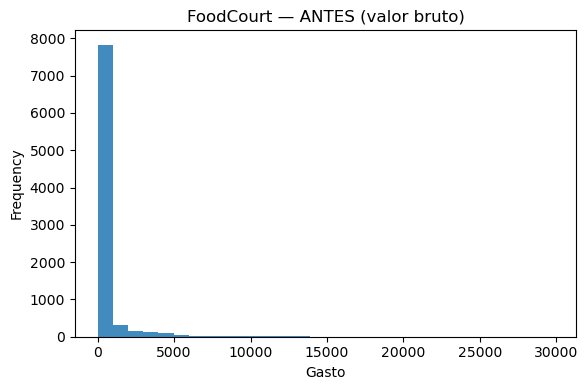

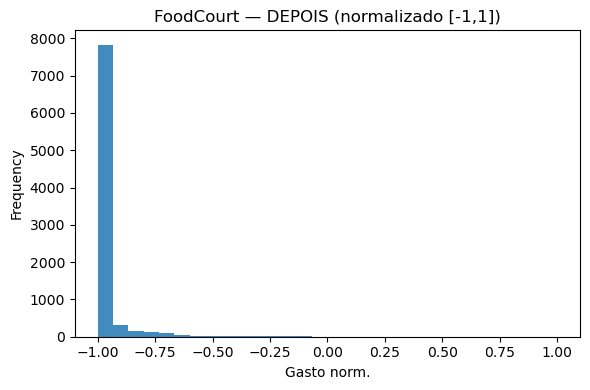

In [6]:




def report_missing(df):
    miss = df.isna().sum()
    miss = miss[miss > 0].sort_values(ascending=False)
    print("\nFaltantes por coluna:\n" + (miss.to_string() if len(miss) else "Nenhum"))
    return miss

def one_hot_manual(series, prefix=None):
    s = series.astype("category")
    cats = list(s.cat.categories)
    out = pd.DataFrame(index=series.index)
    for c in cats:
        col = f"{prefix or series.name}__{c}"
        out[col] = (s == c).astype(int)
    return out

def minmax_pm1_df(df, cols):
    mn = df[cols].min(axis=0)
    mx = df[cols].max(axis=0)
    denom = (mx - mn).replace(0, 1.0)
    scaled = 2 * ((df[cols] - mn) / denom) - 1
    return scaled, mn, mx


def prepare_spaceship_norm(path=CSV_PATH):
    df = pd.read_csv(path)
    print("Carregado:", path, "shape:", df.shape)

    num_cols = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
    bin_cols = ["CryoSleep", "VIP"]           
    cat_cols = ["HomePlanet", "Destination"]   
    target = "Transported"
    for c in num_cols:
        df[c] = pd.to_numeric(df[c], errors="coerce")

    y = df[target].astype(int)

    report_missing(df)
    for c in num_cols:
        df[c] = df[c].fillna(df[c].median())
    for c in bin_cols:
        m = df[c].mode(dropna=True)
        fill = m.iloc[0] if len(m) else False
        df[c] = df[c].fillna(fill).map({True: 1, False: 0}).astype(int)
    for c in cat_cols:
        df[c] = df[c].fillna("Unknown").astype(str)

    oh_parts = [one_hot_manual(df[c], prefix=c) for c in cat_cols]
    X_cat = pd.concat(oh_parts, axis=1)
    X_num_scaled, mn, mx = minmax_pm1_df(df, num_cols)

    X = pd.concat([X_num_scaled[num_cols], df[bin_cols].astype(int), X_cat], axis=1)
    print("Features finais:", X.shape)

    plt.figure(figsize=(6,4)); df["Age"].plot.hist(bins=30, alpha=0.85)
    plt.title("Age — ANTES (valor bruto)"); plt.xlabel("Age"); plt.tight_layout()

    plt.figure(figsize=(6,4)); X_num_scaled["Age"].plot.hist(bins=30, alpha=0.85)
    plt.title("Age — DEPOIS (normalizado [-1,1])"); plt.xlabel("Age norm."); plt.tight_layout()

    plt.figure(figsize=(6,4)); df["FoodCourt"].plot.hist(bins=30, alpha=0.85)
    plt.title("FoodCourt — ANTES (valor bruto)"); plt.xlabel("Gasto"); plt.tight_layout()

    plt.figure(figsize=(6,4)); X_num_scaled["FoodCourt"].plot.hist(bins=30, alpha=0.85)
    plt.title("FoodCourt — DEPOIS (normalizado [-1,1])"); plt.xlabel("Gasto norm."); plt.tight_layout()

    plt.show()
    return X, y, {"min": mn, "max": mx}

X, y, scaler = prepare_spaceship_norm(CSV_PATH)
